# THE SPARKS FOUNDATION

## Object Detection / Optical Character Recognition (ORC)


**Task-1**: Implement an object detector which identifies the classes of the objects in an image or video.

### Author - Khadim SENE

### **Object detection**

Object detection is a subfield of computer vision that deals with identifying instances of semantic objects from digital images and videos. Usually, the identified object is detected and identified by drawing a bounding box around it. In an image, this is a static box, but in a video, this box is in motion, following the live object.

Object detection technology has several applications, such as face detection, people counting, optical character recognition (OCR), and fault and defect detection, among others. This is an exciting field of research and application, and big tech companies are investing and building tools to perform object detection.

In [ ]:
# importing librairies
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Threshold to detect object
thres = 0.45

In [ ]:
# Labels
classNames= []
classFile = '/content/sample_data/labels.txt'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [ ]:
classNames

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
# Configuring both SSD model and weights (assigning)
weightsPath = "/content/sample_data/frozen_inference_graph.pb"
configPath = "/content/sample_data/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt.txt"

In [ ]:
# dnn-Inbuilt method of OpenCV
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 0x7efeaefc9530>

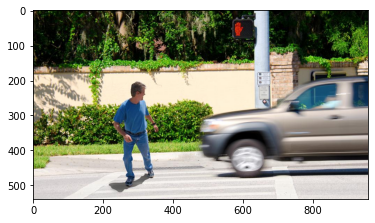

In [ ]:
# load the example image and convert it to grayscale
img = cv2.imread('/content/sample_data/Image1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
# pip install --upgrade opencv-python

In [ ]:
classIds, confs, bbox = net.detect(img,confThreshold=thres)
print(classIds,bbox)

[[ 3]
 [ 1]
 [10]] [[469 185 488 280]
 [230 200 131 308]
 [579  28  41  56]]


In [ ]:
if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        # draw the bounding box on the image
        cv2.rectangle(img,box,color=(0,255,0),thickness=2)
        cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

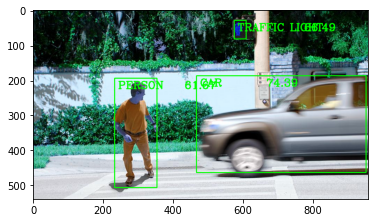

In [ ]:
#show result
plt.imshow(img)

# **------------------------------------- END CODE ----------------------------------------------**